In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from day_ahead_v2.utils.plot_settings import apply_plot_settings, color_palette_2

In [38]:
apply_plot_settings()
list_colors = list(color_palette_2.values())
print(list_colors)

[(0.26666666666666666, 0.4666666666666667, 0.6666666666666666), (0.4, 0.8, 0.9333333333333333), (0.13333333333333333, 0.5333333333333333, 0.2), (0.8, 0.7333333333333333, 0.26666666666666666), (0.9333333333333333, 0.4, 0.4666666666666667), (0.6666666666666666, 0.2, 0.4666666666666667), (0.7333333333333333, 0.7333333333333333, 0.7333333333333333)]


In [39]:
# Import the data
model = np.array(["lightgbm", "mlp", "logistic_regression", "bid_forecast", "hindsight"])

data = {}

for m in model:
    data[m] = pd.read_csv(f"/home/yahei/code/day_ahead_v2/reports/large/{m}/imbalance_data/backtest_results.csv")
print(data["hindsight"].tail())
print(data["hindsight"].columns)

    train_profit_total  train_profit_mean  test_profit_total  \
54       903348.441490         179.235802       26362.016036   
55       902504.487146         179.068351       25172.867615   
56       899952.744185         178.562052       25371.519061   
57       893848.920267         177.350976       27162.535386   
58       891210.377953         176.827456       34070.536983   

    test_profit_mean                train_start                  train_end  \
54        156.916762  2024-02-14 00:00:00+00:00  2024-08-12 00:00:00+00:00   
55        149.838498  2024-02-21 00:00:00+00:00  2024-08-19 00:00:00+00:00   
56        151.020947  2024-02-28 00:00:00+00:00  2024-08-26 00:00:00+00:00   
57        161.681758  2024-03-06 00:00:00+00:00  2024-09-02 00:00:00+00:00   
58        202.800815  2024-03-13 00:00:00+00:00  2024-09-09 00:00:00+00:00   

                  valid_start                  valid_end  \
54  2024-08-12 00:00:00+00:00  2024-09-11 00:00:00+00:00   
55  2024-08-19 00:00:00+00

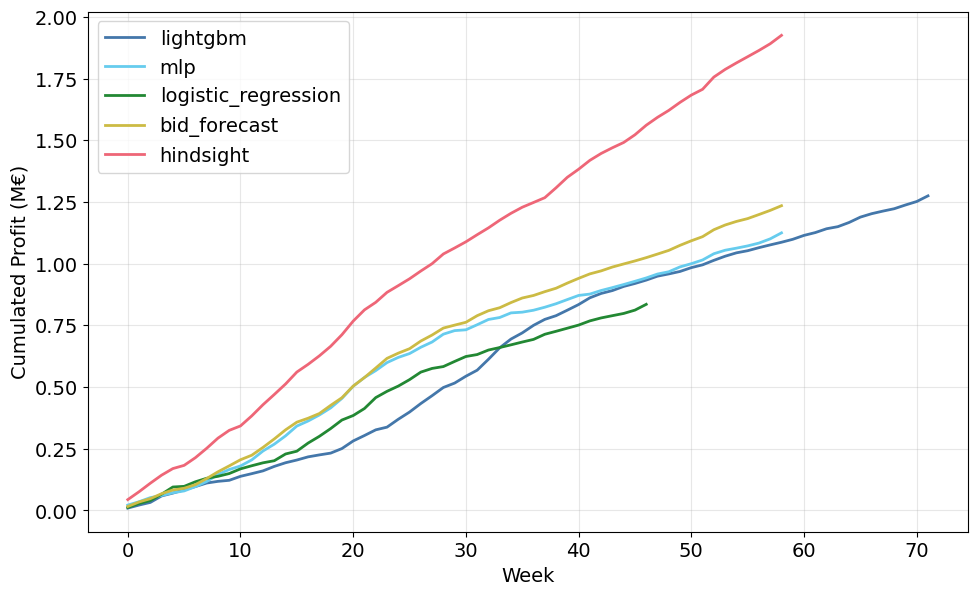

In [40]:
plt.figure()

for i, m in enumerate(model):
    plt.plot(data[m]["test_profit_total"].cumsum() / 1e6, label=m, linewidth=2, color=list_colors[i])

plt.xlabel("Week")
plt.ylabel("Cumulated Profit (M€)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()